## Initialize

In [36]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [46]:
colors = ["darkslateblue","blue", "black", "red","maroon"]
nodes = [0.0,0.35, 0.5, 0.65, 1.0]
mycmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
colors1 = ["yellow","lime", "white", "blue","black"]
nodes1 = [0.0,0.25, 0.5, 0.75, 1.0]
mycmap1 = LinearSegmentedColormap.from_list("mycmap1", list(zip(nodes1, colors1)))

In [2]:
resolution = 30   # pixels/um
r = 0.2
sx = 41
sy = 31
hsx=(sx-1)/2
hsy=(sy-1)/2

fcen = 0.38   # pulse center frequency
df = 0.005  

dpml=2.0
pml_layers = [mp.PML(dpml)]

-----------
Initializing structure...
time for choose_chunkdivision = 0.00943804 s
Working in 2D dimensions.
Computational cell is 45 x 35 x 0 with resolution 30
     cylinder, center = (-20,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-19,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-18,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-17,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-16,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-15,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
 

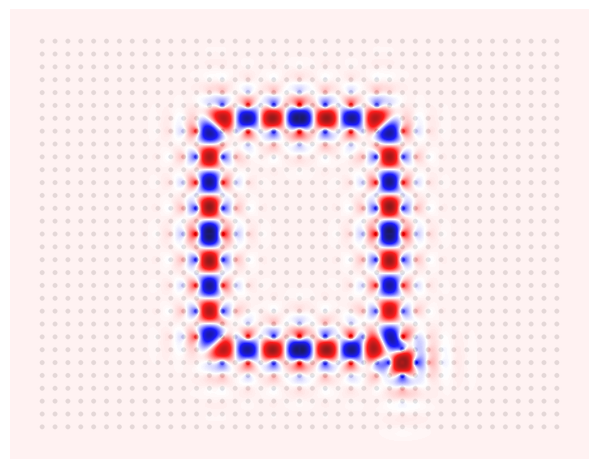

In [58]:
sxt = sx+2*dpml
syt = sy+2*dpml
cell = mp.Vector3(sxt,syt,0)
pl = mp.Ez
geometry = []
#        if i!=hs:
for i in range(sy):
    for j in range(sx):
        geometry.append(mp.Cylinder(r, center=mp.Vector3(j-hsx,i-hsy), material=mp.Medium(epsilon=8.9)))

qx = 15
qxh = (qx-1)/2
qy = 19
qyh = (qy-1)/2

geometry.append(mp.Block(size=mp.Vector3(qx,1,mp.inf), center=mp.Vector3(0,-qyh)))
geometry.append(mp.Block(size=mp.Vector3(qx,1,mp.inf), center=mp.Vector3(0,qyh)))
geometry.append(mp.Block(size=mp.Vector3(1,qy,mp.inf), center=mp.Vector3(-qxh,0)))
geometry.append(mp.Block(size=mp.Vector3(1,qy,mp.inf), center=mp.Vector3(qxh,0)))
geometry.append(mp.Block(size=mp.Vector3(1,5,mp.inf), center=mp.Vector3(qxh,qyh), e2=mp.Vector3(-1,-1,0)))
                
src = [mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=pl,
                 amplitude=5.0,
                 center=mp.Vector3(0,-qyh),
                 size=mp.Vector3(0,0.5)),
      mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=pl,
                 amplitude=5.0,
                 center=mp.Vector3(0,qyh),
                 size=mp.Vector3(0,0.5)),
       mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=pl,
                 amplitude=5.0,
                 center=mp.Vector3(qxh,0),
                 size=mp.Vector3(0.5,0)),
       mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=pl,
                 amplitude=5.0,
                 center=mp.Vector3(-qxh,0),
                 size=mp.Vector3(0.5,0)),
       mp.Source(mp.GaussianSource(0.4, fwidth=df*2),
                 component=pl,
                 amplitude=15.0,
                 center=mp.Vector3(8,10),
                 size=mp.Vector3(0.3,0.3))]
#sym = [mp.Mirror(mp.Y, phase=-1)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    resolution=resolution)
sim.run(until=137)
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=pl)
plt.figure(figsize=(6.0,4.5))
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='seismic', alpha=0.9)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig("crod_array_wvg_q13", dpi=400)
plt.show()

In [93]:
animate = mp.Animate2D(sim,
                       fields=pl,
                       realtime=False,
                       normalize=True,
                       field_parameters={'alpha':0.8, 'cmap':'seismic','interpolation':'none'})
sim.run(mp.at_every(1/fcen/20,animate), until=50)
plt.close()

     cylinder, center = (-10,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-9,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-8,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-7,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-6,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-5,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-4,-13,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectri

In [94]:
animate.to_gif(10, 'crod_array_wvg_5.gif')

Generating GIF...


## Draw 'N'

-----------
Initializing structure...
time for choose_chunkdivision = 0.0140049 s
Working in 2D dimensions.
Computational cell is 45 x 35 x 0 with resolution 30
     cylinder, center = (-20,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-19,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-18,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-17,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-16,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-15,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
  

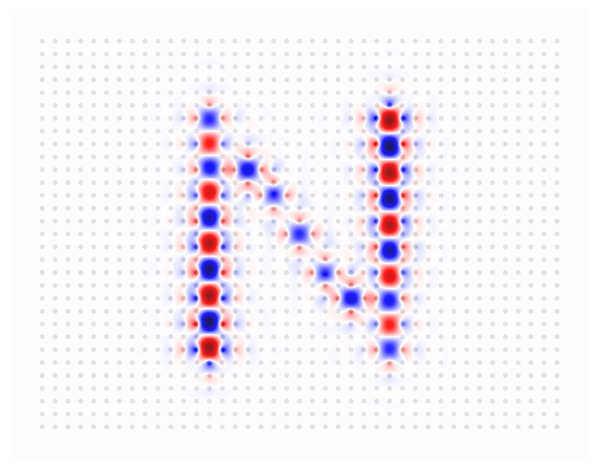

In [59]:
sxt = sx+2*dpml
syt = sy+2*dpml
cell = mp.Vector3(sxt,syt,0)
pl = mp.Ez
geometry = []
#        if i!=hs:
for i in range(sy):
    for j in range(sx):
        geometry.append(mp.Cylinder(r, center=mp.Vector3(j-hsx,i-hsy), material=mp.Medium(epsilon=8.9)))

qx = 15
qxh = (qx-1)/2
qy = 19
qyh = (qy-1)/2

qdp = [[-4,-5],[-2,-2.6],[0,0],[2,2.6],[4,5]]

geometry.append(mp.Block(size=mp.Vector3(1,qy,mp.inf), center=mp.Vector3(-qxh,0)))
geometry.append(mp.Block(size=mp.Vector3(1,qy,mp.inf), center=mp.Vector3(qxh,0)))
#geometry.append(mp.Block(size=mp.Vector3(np.sqrt(15**2+19**2)/19,np.sqrt(15**2+19**2),mp.inf), center=mp.Vector3(), e2=mp.Vector3(qx,qy,0)))

for qd in qdp:
    geometry.append(mp.Block(size=mp.Vector3(1,1,mp.inf), center=mp.Vector3(qd[0],qd[1])))
                
src = [mp.Source(mp.GaussianSource(0.375, fwidth=df*2),
                 component=pl,
                 amplitude=10.0,
                 center=mp.Vector3(qxh,0),
                 size=mp.Vector3(0.5,0)),
       mp.Source(mp.GaussianSource(0.375, fwidth=df*2),
                 component=pl,
                 amplitude=10.0,
                 center=mp.Vector3(-qxh,0),
                 size=mp.Vector3(0.5,0)),
       mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=pl,
                 amplitude=10.0,
                 center=mp.Vector3()),
       mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=pl,
                 amplitude=10.0,
                 center=mp.Vector3(qdp[0][0],qdp[0][1])),
       mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=pl,
                 amplitude=10.0,
                 center=mp.Vector3(qdp[1][0],qdp[1][1])),
       mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=pl,
                 amplitude=10.0,
                 center=mp.Vector3(qdp[3][0],qdp[3][1])),
       mp.Source(mp.GaussianSource(fcen, fwidth=df*2),
                 component=pl,
                 amplitude=10.0,
                 center=mp.Vector3(qdp[4][0],qdp[4][1]))]
#sym = [mp.Mirror(mp.Y, phase=-1)]
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    resolution=resolution)
sim.run(until=400)
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=pl)
plt.figure(figsize=(6.0,4.5))
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='seismic', alpha=0.9)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig("crod_array_wvg_n2", dpi=400)
plt.show()

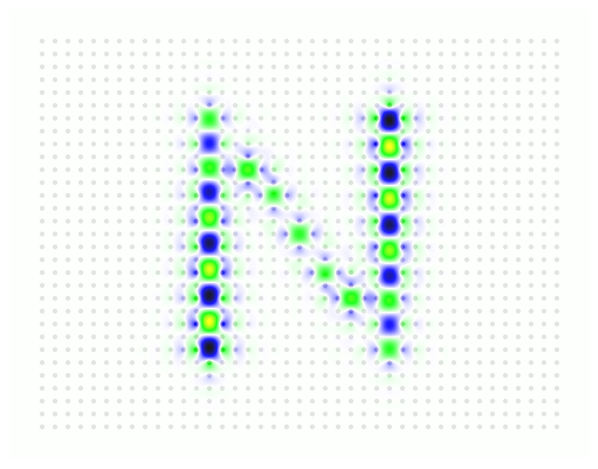

In [56]:
plt.figure(figsize=(6.0,4.5))
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap=mycmap1, alpha=0.9)
plt.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig("crod_array_wvg_n1", dpi=400)
plt.show()

In [19]:
animate = mp.Animate2D(sim,
                       fields=pl,
                       realtime=False,
                       normalize=True,
                       field_parameters={'alpha':0.8, 'cmap':'seismic','interpolation':'none'})
sim.run(mp.at_every(1/fcen/20,animate), until=50)
plt.close()

     cylinder, center = (-20,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-19,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-18,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-17,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-16,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-15,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (8.9,8.9,8.9)
     cylinder, center = (-14,-15,0)
          radius 0.2, height 1e+20, axis (0, 0, 1)
          die

In [20]:
animate.to_gif(10, 'crod_array_wvg_n1.gif')

Generating GIF...
